In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import tabulate
from matplotlib.patches import Ellipse
import statistics
import matplotlib.transforms as transforms

## Постановка задачи:
Сгенерировать двумерные выборки размерами $20, 60, 100$ для нормального двумерного распределения $N(x,y,0,0,1,1,\rho)$. Коэффициент корреляции $\rho$ взять равным $0, 0.5, 0.9.$ Каждая выборка генерируется $1000$ раз и для неё вычисляются: среднее значение, среднее значение квадрата и дисперсия коэффициентов корреляции Пирсона, Спирмена и квадрантного коэффициента корреляции. Повторить все вычисления для смеси нормальных распределений:
\begin{equation}
	f(x,y)=0.9N(x,y,0,0,1,1,0.9)+0.1N(x,y,0,0,10,10,-0.9)
\end{equation}
Изобразить сгенерированные точки на плоскости и нарисовать эллипс равновероятности.



In [49]:
sizes = [20, 60, 100]
correlation_coef = [0, 0.5, 0.9]
mean = [0, 0]
num = 1000

### Генерация выборки:

In [50]:
get_rvs_usual = lambda num, cov: stats.multivariate_normal.rvs(mean, cov, num)

In [51]:
get_rvs_mixed = lambda num, cov: 0.9 * stats.multivariate_normal.rvs(mean, [[1, 0.9], [0.9, 1]], num) \
             + 0.1 * stats.multivariate_normal.rvs(mean, [[10, -0.9], [-0.9, 10]], num)

### Вычисление для выборки среднего значения, среднего значения квадрата и дисперсии коэффициентов корреляции Пирсона, Спирмена и квадрантного коэффициента корреляции:

In [55]:
def median(data):
    return np.median(data)

def quadr_median(data, num):
    return  np.median([pow(data[k], 2) for k in range(num)])

def dispersion(data):
    return statistics.variance(data)

def calculate_coefs(num, cov, rvs_fun):    
    coefs = {'pearson': [], 'spearman': [], 'quadrat':[]}
    for i in range(num):
        sample = rvs_fun(size, cov)
        x, y = sample[:, 0], sample[:, 1]
        coefs['pearson'].append(stats.pearsonr(x, y)[0])
        coefs['spearman'].append(stats.spearmanr(x, y)[0])
        coefs['quadrat'].append(np.mean(np.sign(x - np.median(x)) * np.sign(y - np.median(y))))
    return coefs

### Функция вывода результатов в таблицу

In [56]:
def build_table(num, cov, rvs_fun):
    coefs = calculate_coefs(num, cov, rvs_fun)
    rows = []
    rows.append(['$E(z)$', np.around(median(coefs['pearson']), decimals=3), \
                 np.around(median(coefs['spearman']), decimals=3), \
                 np.around(median(coefs['quadrat']), decimals=3)])
    rows.append(['$E(z^2)$', np.around(quadr_median(coefs['pearson'], num), decimals=3), \
                 np.around(quadr_median(coefs['spearman'], num), decimals=3), \
                 np.around(quadr_median(coefs['quadrat'], num), decimals=3)])
    rows.append(['$D(z)$', np.around(dispersion(coefs['pearson']), decimals=3), \
                 np.around(dispersion(coefs['spearman']), decimals=3), \
                 np.around(dispersion(coefs['quadrat']), decimals=3)])
    return rows

### Вычисления для нормального двумерного распределения:
### $N(x,y,0,0,1,1,\rho)$

In [68]:
for num in sizes:
    print("n = ", num)
    table = []
    for coef in correlation_coef:
        cov = [[1.0, coef], [coef, 1.0]]
        extension_table = build_table(num, cov, get_rvs_usual)
        title_row = ["$\\correlation_coef$ = " + str(coef), '$r$', '$r_S$', '$r_Q$']
        table.append([])
        table.append(title_row)            
        table.extend(extension_table)
    print(tabulate.tabulate(table, headers=[]))

n =  20
-------------------------  ------  ------  -----

$\correlation_coef$ = 0    $r$     $r_S$   $r_Q$
$E(z)$                     -0.021  -0.004  -0.02
$E(z^2)$                   0.003   0.004   0.006
$D(z)$                     0.005   0.005   0.008

$\correlation_coef$ = 0.5  $r$     $r_S$   $r_Q$
$E(z)$                     0.504   0.5     0.34
$E(z^2)$                   0.254   0.25    0.116
$D(z)$                     0.007   0.011   0.015

$\correlation_coef$ = 0.9  $r$     $r_S$   $r_Q$
$E(z)$                     0.895   0.878   0.72
$E(z^2)$                   0.8     0.771   0.518
$D(z)$                     0.0     0.0     0.003
-------------------------  ------  ------  -----
n =  60
-------------------------  ------  ------  -----

$\correlation_coef$ = 0    $r$     $r_S$   $r_Q$
$E(z)$                     -0.008  -0.006  0.0
$E(z^2)$                   0.007   0.006   0.006
$D(z)$                     0.01    0.011   0.012

$\correlation_coef$ = 0.5  $r$     $r_S$   $r_Q$
$E(

### Вычисления для смеси нормальных распределений:
### \begin{equation} f(x,y)=0.9N(x,y,0,0,1,1,0.9)+0.1N(x,y,0,0,10,10,-0.9) \end{equation}

In [69]:
table_mixed = []
for size in sizes:
    extension_table_mixed = build_table(size, None, get_rvs_mixed)
    title_row = ["$n = " + str(size) + "$", '$r$', '$r_S$', '$r_Q$']
    table_mixed.append(title_row)
    table_mixed.extend(extension_table_mixed)
print(tabulate.tabulate(table_mixed, headers=[]))

---------  -----  -----  -----
$n = 20$   $r$    $r_S$  $r_Q$
$E(z)$     0.792  0.756  0.6
$E(z^2)$   0.627  0.573  0.36
$D(z)$     0.007  0.008  0.023
$n = 60$   $r$    $r_S$  $r_Q$
$E(z)$     0.797  0.774  0.6
$E(z^2)$   0.635  0.6    0.36
$D(z)$     0.003  0.004  0.011
$n = 100$  $r$    $r_S$  $r_Q$
$E(z)$     0.794  0.768  0.56
$E(z^2)$   0.63   0.59   0.314
$D(z)$     0.002  0.002  0.007
---------  -----  -----  -----


### Построение эллипсов равновероятностей:

In [65]:
def create_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    r_x = np.sqrt(1 + pearson)
    r_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=r_x * 2, height=r_y * 2, facecolor=facecolor, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


def plot_ellipses(samples):
    plt.rcParams['figure.figsize'] = [12, 4]
    num = len(samples[0])
    fig, ax = plt.subplots(1, len(samples))
    fig.suptitle("n = " + str(num))    
    titles = ['$\\rho = 0$', '$\\rho = 0.5$', '$\\rho = 0.9$']
    i = 0
    for sample in samples:
        x = sample[:, 0]
        y = sample[:, 1]
        ax[i].scatter(x, y, c='black', s=3)
        create_ellipse(x, y, ax[i], edgecolor='gray')
        ax[i].scatter(np.mean(x), np.mean(y), c='blue', s=3)
        ax[i].set_title(titles[i])
        i += 1
    plt.savefig(
        "Ellipse n = " + str(num) + ".png",
        format='png'
    )

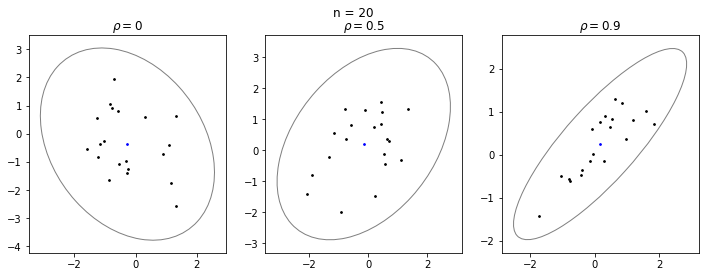

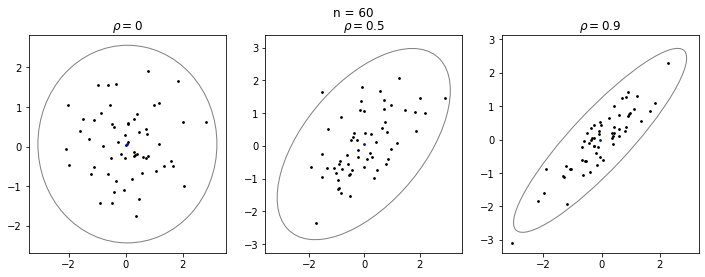

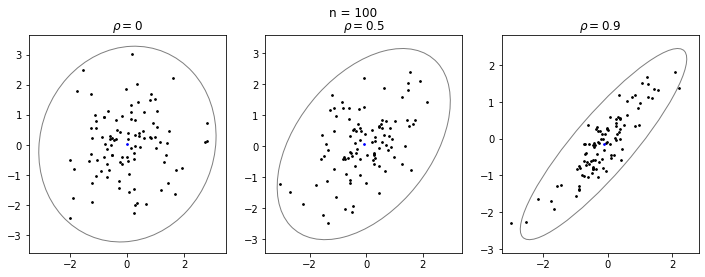

In [66]:
samples = []
for num in sizes:
    for coef in correlation_coef:
        samples.append(get_rvs_usual(num, [[1.0, coef], [coef, 1.0]]))
    plot_ellipses(samples)
    samples = []